In [1]:
import numpy as np 
from collections import OrderedDict
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:
with open("twoCircuitRandomEncodingCost.pkl", "rb") as f:
    two_encoding = pkl.load(f)

with open("twoCircuitResourceEstimation.pkl", "rb") as f:
    two_data = pkl.load(f)

In [5]:
with open("../../data/encodingCost/oneCircuitEncodingCost.pkl", "rb") as f:
    one_encoding = pkl.load(f)

with open("../../data/oneCircuitResourceEstimation.pkl", "rb") as f:
    one_data = pkl.load(f)

In [6]:
one_data

{1: {'depth': 70992,
  'count_ops': OrderedDict([('rz', 63820),
               ('sx', 40084),
               ('ecr', 19340),
               ('x', 2514),
               ('barrier', 6)]),
  'runtime': 11922.06},
 2: {'depth': 105304,
  'count_ops': OrderedDict([('rz', 101015),
               ('sx', 63731),
               ('ecr', 31583),
               ('x', 3715),
               ('barrier', 6)]),
  'runtime': 18003.72},
 3: {'depth': 474197,
  'count_ops': OrderedDict([('rz', 459468),
               ('sx', 289015),
               ('ecr', 141189),
               ('x', 16384),
               ('barrier', 6)]),
  'runtime': 77876.94},
 4: {'depth': 1268120,
  'count_ops': OrderedDict([('rz', 1354893),
               ('sx', 859234),
               ('ecr', 424214),
               ('x', 47917),
               ('barrier', 6)]),
  'runtime': 221209.08},
 5: {'depth': 3883490,
  'count_ops': OrderedDict([('rz', 4061236),
               ('sx', 2585836),
               ('ecr', 1251404),
            

In [75]:
x_one_runtime = []
x_one_ECR = []
y_one = []

# circuit i
for i in list(one_encoding.keys()):
    encoding_data = one_encoding[i]
    resource_data = one_data[i]

    r = resource_data["runtime"]
    x_one_runtime.extend([encoding_data["runtime"][j] + r for j in range(len(encoding_data["runtime"]))])

    ecr = resource_data["count_ops"]['ecr']
    x_one_ECR.extend([encoding_data["count_ops"][j]['ecr'] + ecr for j in range(len(encoding_data["count_ops"]))])

    y_one.extend([i] * len(encoding_data["count_ops"]))

In [32]:
x_two_max_runtime = []
x_two_stream_runtime = []
x_two_vorticity_runtime = []

x_two_max_ECR = []
x_two_stream_ECR = []
x_two_vorticity_ECR = []

y_two = []

# circuit i
for i in list(two_encoding.keys()):
    encoding_data = two_encoding[i]
    resource_data = two_data[i]

    stream_data = resource_data["streamfunction"]
    vorticity_data = resource_data["vorticity"]

    r_stream = stream_data["runtime"]
    r_vorticity = vorticity_data["runtime"]
    r_max = max(r_stream, r_vorticity)

    x_two_max_runtime.extend(
        [encoding_data["runtime"][j] + r_max for j in range(len(encoding_data["runtime"]))]
    )
    x_two_stream_runtime.extend(
        [encoding_data["runtime"][j] + r_stream for j in range(len(encoding_data["runtime"]))]
    )
    x_two_vorticity_runtime.extend(
        [encoding_data["runtime"][j] + r_vorticity for j in range(len(encoding_data["runtime"]))]
    )

    ecr_stream = stream_data["count_ops"]['ecr']
    ecr_vorticity = vorticity_data["count_ops"]['ecr']
    ecr_max = max(ecr_stream, ecr_vorticity)

    x_two_max_ECR.extend(
        [encoding_data["count_ops"][j]['ecr'] + ecr_max for j in range(len(encoding_data["count_ops"]))]
    )
    x_two_stream_ECR.extend(
        [encoding_data["count_ops"][j]['ecr'] + ecr_stream for j in range(len(encoding_data["count_ops"]))]
    )
    x_two_vorticity_ECR.extend(
        [encoding_data["count_ops"][j]['ecr'] + ecr_vorticity for j in range(len(encoding_data["count_ops"]))]
    )

    y_two.extend([i] * len(encoding_data["count_ops"]))

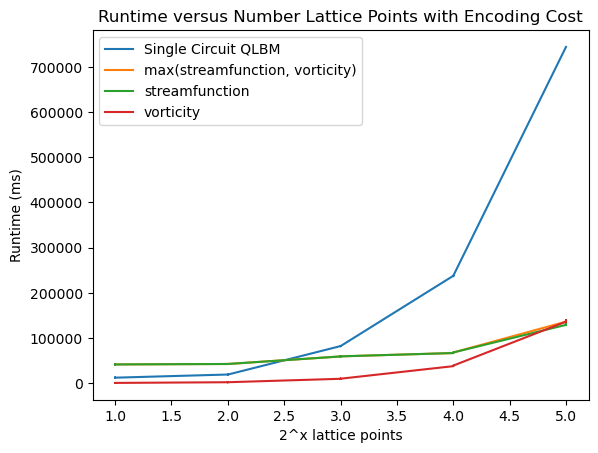

In [76]:
plt.plot(y_one, x_one_runtime, label="Single Circuit QLBM")
plt.plot(y_two, x_two_max_runtime, label="max(streamfunction, vorticity)")
plt.plot(y_two, x_two_stream_runtime, label="streamfunction")
plt.plot(y_two, x_two_vorticity_runtime, label="vorticity")

plt.legend()
plt.ylabel("Runtime (ms)")
plt.xlabel("2^x lattice points")
plt.title("Runtime versus Number Lattice Points with Encoding Cost")
plt.show()

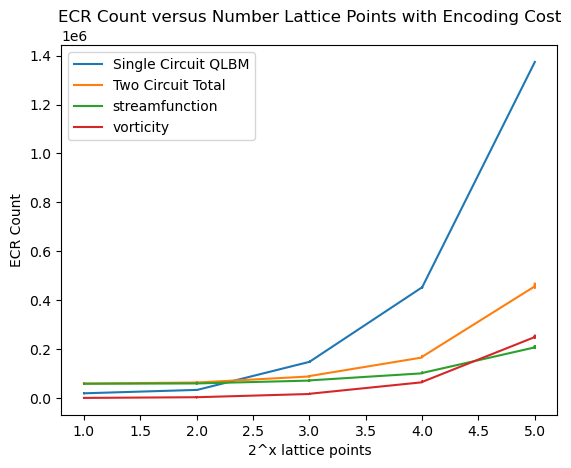

In [77]:
plt.plot(y_one, x_one_ECR, label="Single Circuit QLBM")
plt.plot(y_two, [x_two_stream_ECR[i] + x_two_vorticity_ECR[i] for i in range(len(x_two_vorticity_ECR))], label="Two Circuit Total")
plt.plot(y_two, x_two_stream_ECR, label="streamfunction")
plt.plot(y_two, x_two_vorticity_ECR, label="vorticity")

plt.legend()
plt.ylabel("ECR Count")
plt.xlabel("2^x lattice points")
plt.title("ECR Count versus Number Lattice Points with Encoding Cost")
plt.show()

In [54]:
with open("twoCircuitRandomEncodingCost.pkl", "rb") as f:
    random = pkl.load(f)

In [60]:
depth = []
ecr_count = []
runtime = []
x = []

for i in list(random.keys()):
    depth.extend(random[i]["depth"])
    runtime.extend(random[i]["runtime"])
    ecr_count.extend([random[i]["count_ops"][j]['ecr'] for j in range(len(random[i]["depth"]))])

    x.extend([i] * len(random[i]["depth"]))

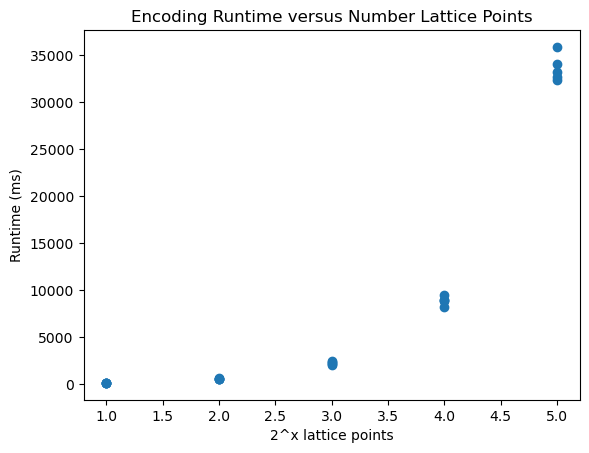

In [62]:
plt.scatter(x, runtime)
plt.xlabel("2^x lattice points")
plt.ylabel("Runtime (ms)")
plt.title("Encoding Runtime versus Number Lattice Points")
plt.show()

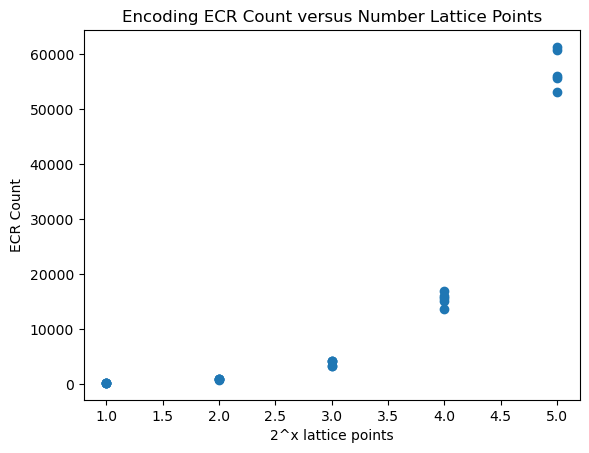

In [63]:
plt.scatter(x, ecr_count)
plt.xlabel("2^x lattice points")
plt.ylabel("ECR Count")
plt.title("Encoding ECR Count versus Number Lattice Points")
plt.show()

In [64]:
total_ecr = [x_two_stream_ECR[i] + x_two_vorticity_ECR[i] for i in range(len(x_two_vorticity_ECR))]

In [ ]:
# get median ECR counts
nsamples = 5


25

In [67]:
len(y_two)

25